In [3]:
import random
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [17]:
"""
Question 3: K-Means
"""
class Cluster:
    def __init__(self, centroid=None):
        self.centroid = np.array(centroid)
        self.clear()
    
    def clear(self):
        self.points = []

    def update_centroid(self):
        if len(self.points):
            self.centroid = np.array(self.points).mean(axis=0, keepdims=False)
        else:
            self.centroid = None

    def remove_points(self, del_points):
        for p in del_points:
            if p in self.points:
                self.points.remove(p)
        # self.points = np.delete(self.points, np.isin(del_points, self.points))

def euclidean_distance(a, b):
    return np.sum(np.square(a - b))

def calculate_loss(clusters):
    loss = 0.0
    for cluster in clusters:
        # print(cluster.centroid)
        print("")
        for point in cluster.points:
            dist = euclidean_distance(point, cluster.centroid)
            loss += dist
            print(f"x={point}, centroid={cluster.centroid}, distance={dist}")
        # print(loss)
    return loss

def update_centroids(clusters):
    # check for empty clusters
    for cluster in clusters:
        if not len(cluster.points):
            # split largest cluster's points with empty cluster
            sorted_clusters = clusters.copy()
            sorted_clusters.sort(reverse=True, key=lambda x: len(x.points))
            max_cluster = sorted_clusters[0]

            print(f"max_size={len(max_cluster.points)}, min_size={len(cluster.points)}")
            n_split = len(max_cluster.points) // 2
            cluster.points = max_cluster.points[:n_split]
            max_cluster.points = max_cluster.points[n_split:]
            print(f"max_size={len(max_cluster.points)}, min_size={len(cluster.points)}")

    # re-calculate mean centroids
    for cluster in clusters:
        cluster.update_centroid()

def assign_points(clusters, samples):
    # calculate distance matrix
    distances = np.zeros((len(samples), len(clusters)))
    for j, cluster in enumerate(clusters):
        cluster.clear()
        # print("")
        for i, sample in enumerate(samples):
            distances[i, j] = euclidean_distance(cluster.centroid, sample)
            # print(f"x={sample}, centroid={cluster.centroid}, distance={distances[i, j]}")
    # print(distances)

    # assign point to cluster with minimum distance
    min_indices = np.argmin(distances, axis=1)
    # print(min_indices)
    for i, idx in enumerate(min_indices):
        clusters[idx].points.append(samples[i])
    return clusters

def generate_history(i, clusters, samples):
    results = {'iter': i}
    for j, cluster in enumerate(clusters):
        c_name = f"c{j}"
        results[c_name] = str(cluster.centroid)
    for j, cluster in enumerate(clusters):
        for sample in cluster.points:
            results[str(sample)] = str(j)
    return results

def k_means(X, k, clusters=None, iterations=100):
    # init clusters
    random.seed(777)
    if not clusters:
        clusters = [Cluster(random.choice(X)) for _ in range(k)]

    # k-means loop
    historys = []
    for i in range(iterations):
        # print(f"i={i}:")
        assign_points(clusters, X)
        historys.append(generate_history(i, clusters, X))
        update_centroids(clusters)
        # print("")
    history_df = pd.DataFrame.from_records(historys).set_index('iter')

    # calculate final loss
    loss = calculate_loss(clusters)

    # return results
    return history_df, loss

In [18]:
"""
Parts 3.1 & 3.2
"""
samples = np.array([
    [3, 3],
    [7, 9],
    [9, 7],
    [5, 3],
])
clusters = [
    Cluster([6, 5]),
    Cluster([6, 6]),
]

history_df, loss = k_means(samples, k=2, clusters=clusters, iterations=3)
display(history_df)
print(f"loss={loss}")


x=[3 3], centroid=[4. 3.], distance=1.0
x=[5 3], centroid=[4. 3.], distance=1.0

x=[7 9], centroid=[8. 8.], distance=2.0
x=[9 7], centroid=[8. 8.], distance=2.0


,c0,c1,[3 3],[5 3],[7 9],[9 7]
iter,,,,,,
0,[6 5],[6 6],0,0,1,1
1,[4. 3.],[8. 8.],0,0,1,1
2,[4. 3.],[8. 8.],0,0,1,1


loss=6.0


(699, 9)
max_size=494, min_size=0
max_size=247, min_size=247
max_size=431, min_size=0
max_size=216, min_size=215
max_size=250, min_size=0
max_size=125, min_size=125
max_size=203, min_size=0
max_size=102, min_size=101
max_size=185, min_size=0
max_size=93, min_size=92
max_size=185, min_size=0
max_size=93, min_size=92
max_size=151, min_size=0
max_size=76, min_size=75


,loss
k,
2,19782.729804
3,16705.818619
4,15660.168785
5,15400.846418
6,13196.445002
7,13054.869905
8,12249.278619


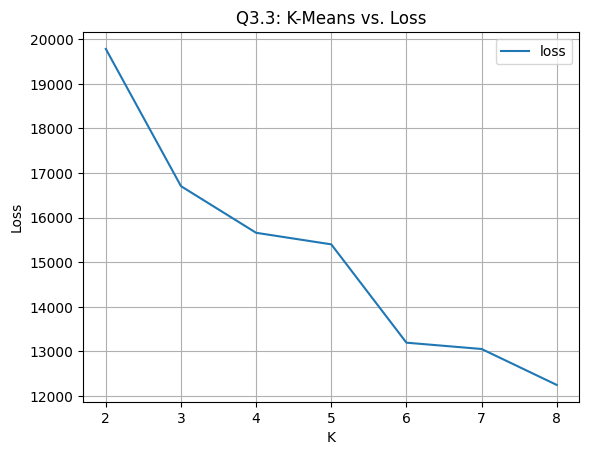

In [8]:
"""
Part 3.3
"""  
# fetch dataset 
breast_cancer_wisconsin = fetch_ucirepo(id=15) 

# data samples
X = breast_cancer_wisconsin.data.features.fillna(0).to_numpy()
print(X.shape)

# run experiments
results = []
for k in range(2, 8 + 1):
    history, loss = k_means(X, k=k)
    results.append({
        'k': k,
        'loss': loss,
    })
    # print(history)

# build results dataframe
results_df = pd.DataFrame.from_records(results).set_index('k')
display(results_df)
ax = results_df.plot(
    xlabel="K",
    ylabel="Loss",
    title="Q3.3: K-Means vs. Loss",
    grid=True,
)
plt.savefig('Q3-3.png')